# correlation

In [1]:
import warnings
warnings.simplefilter("ignore")
from scipy import stats
import numpy as np
import pandas as pd
#
import matplotlib
import matplotlib.pyplot as plt
#
import seaborn as sns

In [2]:
# 描画設定
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.family': 'sans-serif', 'text.usetex': False,'pcolor.shading':'auto'})

In [3]:
class Site:
    def DomeF(self):
        # DomeF
        # 南緯77度19分01秒 東経39度42分12秒座標: 南緯77度19分01秒 東経39度42分12秒
        sx=14 ; sy=60 #;; # 77°18′59″S 39°42′04″E
        df_lat=-77.3
        df_lon=39.66
        return df_lon,df_lat,sx,sy


df_lon,df_lat,df_x,df_y = Site().DomeF()

In [4]:
def Mon():
    import pandas as pd
    mons = pd.DataFrame({
            "name": ["Jan", "Feb", "Mar","Apr","May","Jun",\
                     "Jul","Aug","Sep","Oct","Nov","Dec","Jan"], 
            "days": [31,28,31,30,31,30,31,31,30,31,30,31,31], 
            "dayacc":[0,31,59,90,120,151,181,212,243,273,304,334,365], 
            "days_lp": [31,29,31,30,31,30,31,31,30,31,30,31,31], 
            "dayacc_lp":[0,31,60,91,121,152,182,213,244,274,305,335,366]             
            })
    return mons
mons=Mon()

In [5]:
def draw_d18O2(df):
    x=np.arange(1,13,1)
    ax  = fig.add_subplot(1,1,1)
    ax.plot(    x,   df["corr_temp"],label="Surface Air Temperature Anomaly",
            linewidth=1 ,                  color="red")
    ax.scatter( x,   df["corr_temp"],\
               marker="o"   ,linewidths=2, c="red"      ,edgecolor="red")
    ax.plot(    x,   df["corr_prcp"],label="Daily Precipitation",
            linewidth=1 ,                  color="darkgreen")
    ax.scatter( x,   df["corr_prcp"],\
               marker="o"   ,linewidths=2, c="darkgreen",edgecolor="darkgreen")
    ax.plot(    x,   df["corr_sam" ],label="SAM-index"  ,
            linewidth=1 ,                  color="blue")
    ax.scatter( x,   df["corr_sam"],\
               marker="o"   ,linewidths=2, c="blue"     ,edgecolor="blue")
    #
    ax.set_xticks(x)
    ax.set_xticklabels(mons["name"][:12])
    ax.set_ylim( (-0.6,0.6))
    ax.set_yticks([-0.6,-0.4,-0.2,0,0.2,0.4,0.6])
    ax.axhline(y= 0.0,ls='-' ,linewidth=0.5, color='k')
    ax.axhline(y=-0.2,ls='--',linewidth=0.5, color='k')
    ax.axhline(y=-0.4,ls='--',linewidth=0.5, color='k')
    ax.axhline(y=-0.6,ls='--',linewidth=0.5, color='k')
    ax.axhline(y=-0.8,ls='--',linewidth=0.5, color='k')
    ax.axhline(y= 0.2,ls='--',linewidth=0.5, color='k')
    ax.axhline(y= 0.4,ls='--',linewidth=0.5, color='k')
    ax.axhline(y= 0.6,ls='--',linewidth=0.5, color='k')
    ax.axhline(y= 0.8,ls='--',linewidth=0.5, color='k')
    ax.legend(loc="center")
    #
    ax.set_ylabel("Correlation coefficient")

In [23]:
def draw_d18O3(df):
    x=np.arange(1,13,1)
    ax  = fig.add_subplot(1,1,1)
    ax.plot(    x,   df["corr_temp"],label="Surface Air Temperature Anomaly",
            linewidth=1 ,                  color="red")
    ax.scatter( x,   df["corr_temp"],\
               marker="o"   ,linewidths=2, c="red"      ,edgecolor="red")
    ax.plot(    x,   df["corr_prcp"],label="Daily Precipitation",
            linewidth=1 ,                  color="darkgreen")
    ax.scatter( x,   df["corr_prcp"],\
               marker="o"   ,linewidths=2, c="darkgreen",edgecolor="darkgreen")
    #
    ax.set_xticks(x)
    ax.set_xticklabels(mons["name"][:12])
    ax.set_ylim( (-0.6,0.6))
    ax.set_yticks([-0.6,-0.4,-0.2,0,0.2,0.4,0.6])
    ax.axhline(y= 0.0,ls='-' ,linewidth=0.5, color='k')
    ax.axhline(y=-0.2,ls='--',linewidth=0.5, color='k')
    ax.axhline(y=-0.4,ls='--',linewidth=0.5, color='k')
    ax.axhline(y=-0.6,ls='--',linewidth=0.5, color='k')
    ax.axhline(y=-0.8,ls='--',linewidth=0.5, color='k')
    ax.axhline(y= 0.2,ls='--',linewidth=0.5, color='k')
    ax.axhline(y= 0.4,ls='--',linewidth=0.5, color='k')
    ax.axhline(y= 0.6,ls='--',linewidth=0.5, color='k')
    ax.axhline(y= 0.8,ls='--',linewidth=0.5, color='k')
    ax.legend(loc="center")
    #
    ax.set_ylabel("Correlation coefficient")

In [6]:
loadfile = "T2_anom.npz"
dataset = np.load(loadfile)
T2 = dataset["T2"]
lon2 = dataset["lon2"]
lat2 = dataset["lat2"]
y = dataset["y"]
m = dataset["m"]
d = dataset["d"]

In [7]:
loadfile = "prcp.npz"
dataset = np.load(loadfile)
prcp = dataset["prcp"]

In [8]:
loadfile = "prcp_d18O_anom.npz"
dataset = np.load(loadfile)
prcp_d18O = dataset["prcp_d18O"]

In [9]:
loadfile = "sam.npz"
dataset = np.load(loadfile)
sam  = dataset["sam"][:]

In [10]:
temp_df = T2  [df_x-1, df_y-1, :]
prcp_df = prcp[df_x-1, df_y-1, :]
# removing abnormal values
is_r_prcp_d18O = np.squeeze(prcp_d18O[df_x-1, df_y-1,:]<-125)
prcp_d18O_df   = np.zeros(len(m))
prcp_d18O_df   = prcp_d18O[df_x-1, df_y-1,:]
prcp_d18O_df[is_r_prcp_d18O] = np.nan

In [11]:
df_all = pd.DataFrame.from_dict({
    "Number": np.zeros((len(prcp_d18O_df))),
    "Year": y,
    "Mon" : m,
    "Date": d,
    "d18O": prcp_d18O_df,
    "temp": temp_df     ,
    "prcp": prcp_df     ,
    "sam" : sam         ,
},orient="columns")

In [12]:
df_all = df_all.dropna(how="any")
num = np.zeros(12)
for mm in range(12):
    num[mm] = len(df_all[df_all["Mon"]==mm+1])

## Parametric test

In [13]:
def shapiro(varin, var, p_value=0.05):
    df_out = pd.DataFrame.from_dict({
        "t":np.zeros(12),
        "p":np.zeros(12)
    }, orient="columns")
    df_out.index = mons["name"][:12]
    for mm in range(12):
        df =  varin[varin["Mon"]==mm+1]   
        norm=(df[var]-np.nanmean(df[var]))/(np.nanstd(df[var])/len(df[var]))
        if len(df) < 3:
            df_out["t"][mm], df_out["p"][mm] = np.nan, np.nan
        else:
            df_out["t"][mm], df_out["p"][mm] = stats.shapiro(df[var])
    return df_out.T

In [14]:
# Normalization
for var in ["d18O","temp","prcp","sam"]:
    print(var)
    display(shapiro(df_all[["Mon",var]], var)   )

d18O


name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
t,9.762952e-01,0.996436,0.994579,0.997249,0.998164,0.998176,0.997019,0.998847,0.997969,0.995324,0.997263,9.793935e-01
p,3.634890e-11,0.052560,0.002040,0.130987,0.421336,0.456850,0.081466,0.828620,0.358072,0.010220,0.137536,3.432896e-10


temp


name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
t,0.996975,9.849231e-01,9.838561e-01,9.797432e-01,0.990650,9.835623e-01,0.990666,9.802893e-01,0.988454,0.988430,9.863237e-01,9.836602e-01
p,0.076097,1.185676e-07,1.299316e-08,7.470872e-10,0.000012,1.602271e-08,0.000013,6.831488e-10,0.000002,0.000003,2.126722e-07,1.094788e-08


prcp


name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
t,6.664805e-01,5.781267e-01,5.658171e-01,4.987428e-01,0.438601,0.435968,5.196257e-01,5.263574e-01,5.667645e-01,0.153124,4.927961e-01,7.005506e-01
p,3.472646e-39,5.077325e-41,5.479077e-43,1.401298e-44,0.000000,0.000000,1.681558e-44,2.802597e-44,2.476094e-42,0.000000,1.261169e-44,1.099606e-37


sam


name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
t,0.990830,9.836976e-01,0.994124,9.844801e-01,0.991970,0.990564,0.993301,9.581355e-01,0.992040,0.994598,9.861568e-01,9.789345e-01
p,0.000015,4.165963e-08,0.001066,3.558043e-08,0.000061,0.000016,0.000343,1.194353e-15,0.000095,0.003753,1.817585e-07,2.430285e-10


In [15]:
def std(varin, var):
    df_out = pd.DataFrame.from_dict({
        "std":np.zeros(12)
    }, orient="columns")
    df_out.index = mons["name"][:12]
    for mm in range(12):
        df =  varin[varin["Mon"]==mm+1]   
        df_out["std"][mm] = np.nanstd(df[var])

    return df_out.T

In [16]:
# Standard deviation
for var in ["d18O","temp","prcp","sam"]:
    print(var)
    display(std(df_all[["Mon",var]], var)   )

d18O


name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
std,7.081833,9.388763,10.111493,11.628659,13.685036,13.652215,14.891216,13.699664,13.557538,14.251908,10.550826,7.353654


temp


name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
std,2.783988,4.474789,5.717089,6.841901,8.238716,8.453099,8.570758,7.414904,6.967108,6.088799,4.506928,2.767923


prcp


name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
std,0.245274,0.163987,0.111699,0.15215,0.147287,0.201611,0.15082,0.10252,0.087118,0.306586,0.178029,0.28899


sam


name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
std,0.760275,0.8322,0.809772,0.914783,1.16685,1.130166,1.228828,1.085305,1.09517,0.980684,0.936578,0.941106


In [17]:
df_std = pd.DataFrame(data=[num,
                            std(df_all[["Mon","temp"]], "temp").T["std"].values / np.nanstd(df_all[["temp"]]),
                            std(df_all[["Mon","d18O"]], "d18O").T["std"].values / np.nanstd(df_all[["d18O"]]),
                            std(df_all[["Mon","prcp"]], "prcp").T["std"].values / np.nanstd(df_all[["prcp"]]),
                            std(df_all[["Mon","sam" ]], "sam").T["std"].values  / np.nanstd(df_all[["sam"]]),

          ], columns=mons["name"][:12],
    index=["Number","temp","d18O", "prcp", "sam"]).T
df_std.T

name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Number,930.000000,847.000000,930.000000,900.000000,930.000000,900.000000,930.000000,930.000000,896.000000,858.000000,893.000000,930.000000
temp,0.435457,0.699923,0.894237,1.070174,1.288657,1.322190,1.340593,1.159801,1.089759,0.952378,0.704950,0.432944
d18O,0.593249,0.786501,0.847045,0.974139,1.146402,1.143653,1.247445,1.147628,1.135722,1.193890,0.883848,0.616019
prcp,1.260074,0.842469,0.573843,0.781656,0.756675,1.035759,0.774826,0.526687,0.447558,1.575057,0.914607,1.484662
sam,0.759028,0.830835,0.808444,0.913282,1.164936,1.128313,1.226813,1.083525,1.093374,0.979076,0.935042,0.939562


In [18]:
def draw_std(df):
    x=np.arange(1,13,1)
    ax  = fig.add_subplot(1,1,1)
    ax.plot(    x,   df["temp"],label="Surface Air Temperature Anomaly",
            linewidth=1 ,                  color="red")
    ax.scatter( x,   df["temp"],
               marker="o"   ,linewidths=2, c="red"      ,edgecolor="red")

    ax.plot(    x,   df["d18O" ],label="$\mathsf{\delta^{18}O_p}$ anomaly"  ,
            linewidth=1 ,                  color="magenta")
    ax.scatter( x,   df["d18O"],
               marker="o"   ,linewidths=2, c="magenta"     ,edgecolor="magenta")
    ax.plot(    x,   df["prcp" ],label="Daily precipitation"  ,
            linewidth=1 ,                  color="darkgreen")
    ax.scatter( x,   df["prcp"],
               marker="o"   ,linewidths=2, c="darkgreen"     ,edgecolor="darkgreen")
    ax.plot(    x,   df["sam" ],label="Daily SAM-index"  ,
            linewidth=1 ,                  color="blue")
    ax.scatter( x,   df["sam"],
               marker="o"   ,linewidths=2, c="blue"     ,edgecolor="blue")
    #
    ax.set_xticks(x)
    ax.set_xticklabels(mons["name"][:12])
    ax.set_ylim( (0,1.6))
    ax.axhline(y= 1.0,ls='-' ,linewidth=0.5, color='k')
    ax.axhline(y= 1.4,ls='--',linewidth=0.5, color='k')
    ax.axhline(y= 0.6,ls='--',linewidth=0.5, color='k')

    ax.legend(loc="lower center")
    #
    ax.set_ylabel("monthly SD / Annual SD")


In [19]:
def draw_std2(df):
    x=np.arange(1,13,1)
    ax  = fig.add_subplot(1,1,1)
    ax.plot(    x,   df["temp"]* np.nanstd(df_all[["temp"]]),label="Surface Air Temperature Anomaly",
            linewidth=1 ,                  color="red")
    ax.scatter( x,   df["temp"]* np.nanstd(df_all[["temp"]]),
               marker="o"   ,linewidths=2, c="red"      ,edgecolor="red")
    ax2=ax.twinx()
    ax2.plot(    x,   df["d18O" ]* np.nanstd(df_all[["d18O"]]),label="$\mathsf{\delta^{18}O_p}$ anomaly"  ,
            linewidth=1 ,                  color="magenta")
    ax2.scatter( x,   df["d18O"]* np.nanstd(df_all[["d18O"]]),
               marker="o"   ,linewidths=2, c="magenta"     ,edgecolor="magenta")

    #
    ax.set_xticks(x)
    ax.set_xticklabels(mons["name"][:12])
#    ax.set_ylim( (0.4,1.4))
    ax.axhline(y= np.nanstd(df_all[["temp"]]),ls='-' ,linewidth=0.5, color='k')
    ax2.axhline(y= np.nanstd(df_all[["d18O"]]),ls='-' ,linewidth=0.5, color='k')
#    plt.text(x[0]-0.2, np.nanstd(df_all[["d18O"]])+0.3,"Annual SD")

    h1, l1 = ax.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    plt.legend(h1+h2, l1+l2, loc='lower center')
    #
    ax.set_ylabel("Surface Air Temperature [\u00b0C]")
    ax2.set_ylabel("$\mathsf{\delta^{18}O_p}$ [\u2030]")


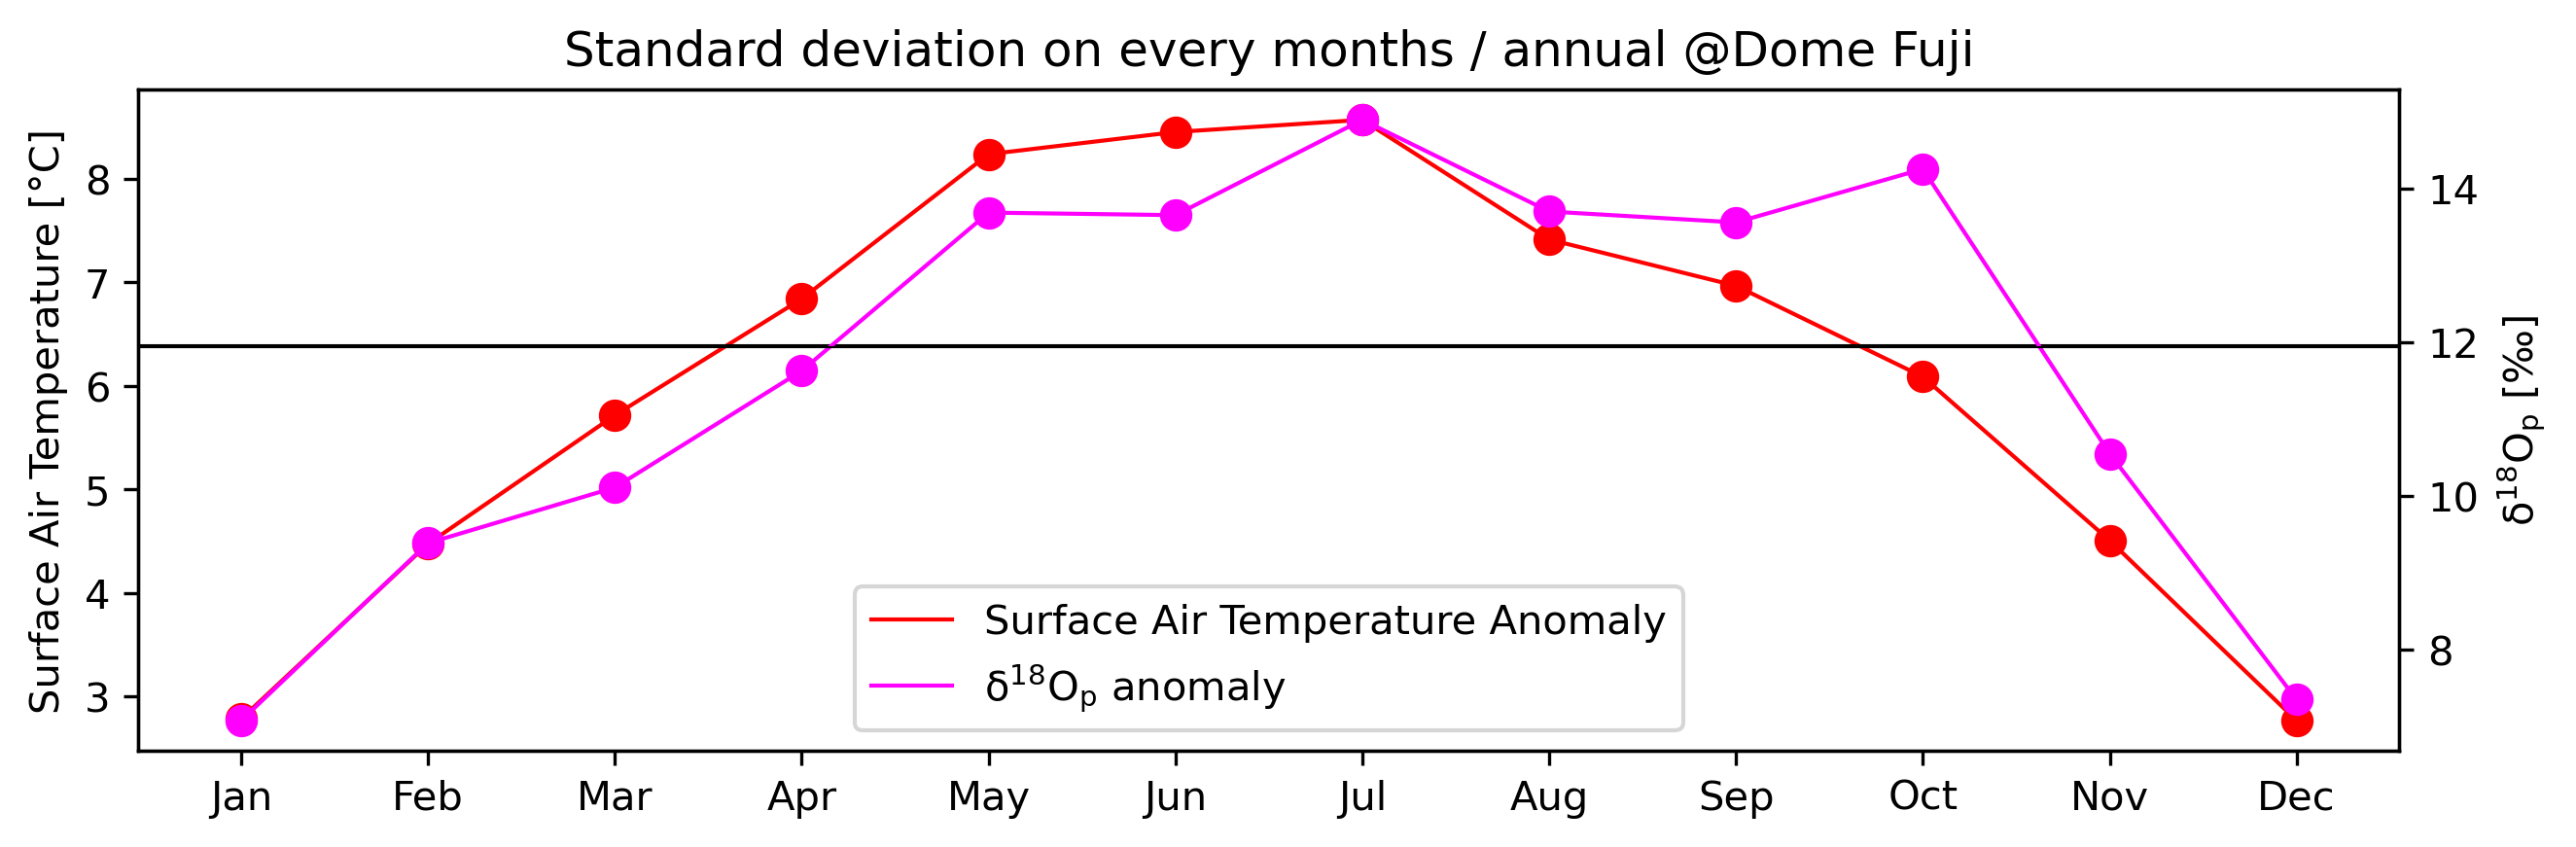

In [20]:
fig = plt.figure(figsize=(10,3)) 
ax = draw_std2(df_std)
plt.title("Standard deviation on every months / annual @Dome Fuji")
plt.show()
fig.savefig("std.png")

In [21]:
def pearson(varin, var1,var2, p_value=0.05):
    # https://qiita.com/dacciinfo/items/88debe69f9f4e927aafc
    df_out = pd.DataFrame.from_dict({
        "r":np.zeros(12),
        "p":np.zeros(12)
    }, orient="columns")
    df_out.index = mons["name"][:12]
    
    for mm in range(12):
        df =  varin[varin["Mon"]==mm+1]   
        df_out["r"][mm], df_out["p"][mm] = stats.pearsonr(df[var1],df[var2])
    return df_out.T.round(3) 

In [22]:
df_corr = pd.DataFrame(data=[num,
          pearson(df_all[["Mon","d18O","temp"]],"temp","d18O").T["r"].values,
          pearson(df_all[["Mon","d18O","prcp"]],"prcp","d18O").T["r"].values,
          pearson(df_all[["Mon","d18O","sam" ]],"sam" ,"d18O").T["r"].values
          ], columns=mons["name"][:12],
    index=["Number","corr_temp", "corr_prcp", "corr_sam"]).T
df_corr.T

name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Number,930.000,847.000,930.000,900.000,930.000,900.000,930.000,930.000,896.000,858.000,893.000,930.000
corr_temp,-0.276,0.158,0.476,0.468,0.514,0.569,0.567,0.529,0.474,0.476,0.083,-0.165
corr_prcp,-0.435,-0.124,0.368,0.425,0.353,0.386,0.395,0.339,0.333,0.165,-0.181,-0.440
corr_sam,-0.071,-0.133,-0.184,-0.209,-0.324,-0.410,-0.486,-0.428,-0.356,-0.337,-0.211,-0.111


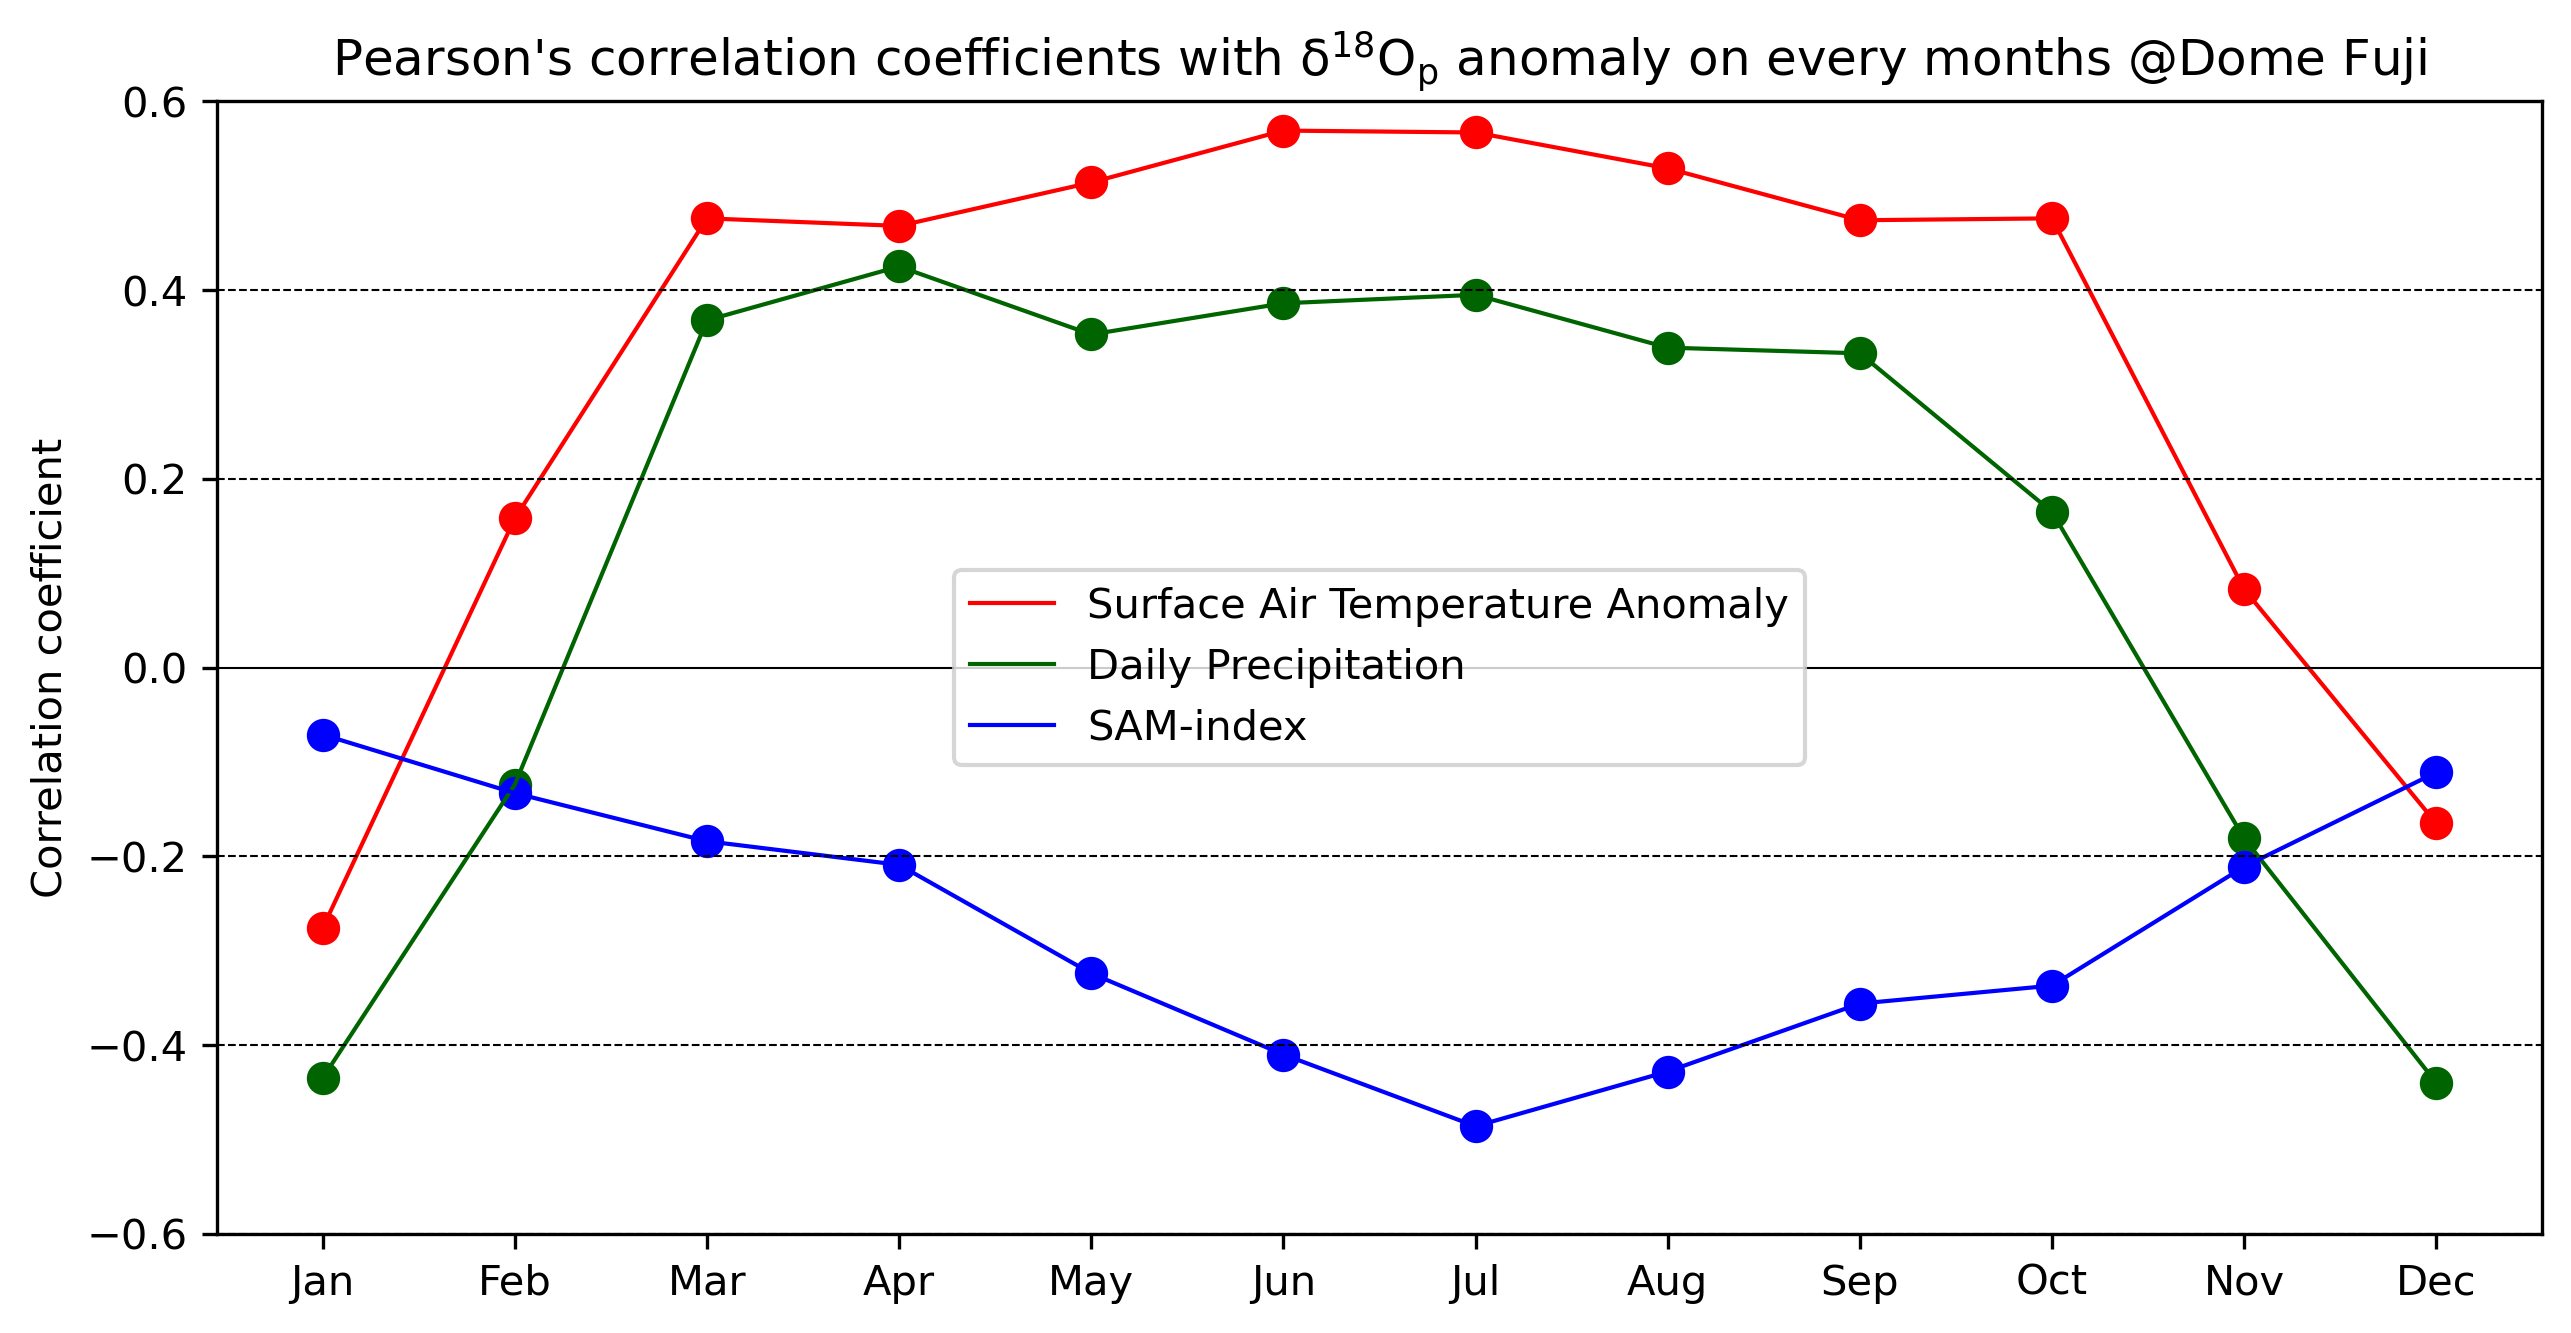

In [17]:
fig = plt.figure(figsize=(10,5)) 
ax = draw_d18O2(df_corr)
plt.title("Pearson's correlation coefficients with $\mathsf{\delta^{18}O_p}$ anomaly on every months @Dome Fuji")
plt.show()
fig.savefig("correlation.png")

## Non-parametric tests

In [25]:
p_value=0.05

In [26]:
def spearmanr(varin, var1,var2, p_value=0.05):
    # https://qiita.com/dacciinfo/items/88debe69f9f4e927aafc
    df_out = pd.DataFrame.from_dict({
        "r":np.zeros(12),
        "p":np.zeros(12)
    }, orient="columns")
    df_out.index = mons["name"][:12]
    
    for mm in range(12):
        df =  varin[varin["Mon"]==mm+1]   
        df_out["r"][mm], df_out["p"][mm] = stats.spearmanr(df[var1],df[var2])
    return df_out.T

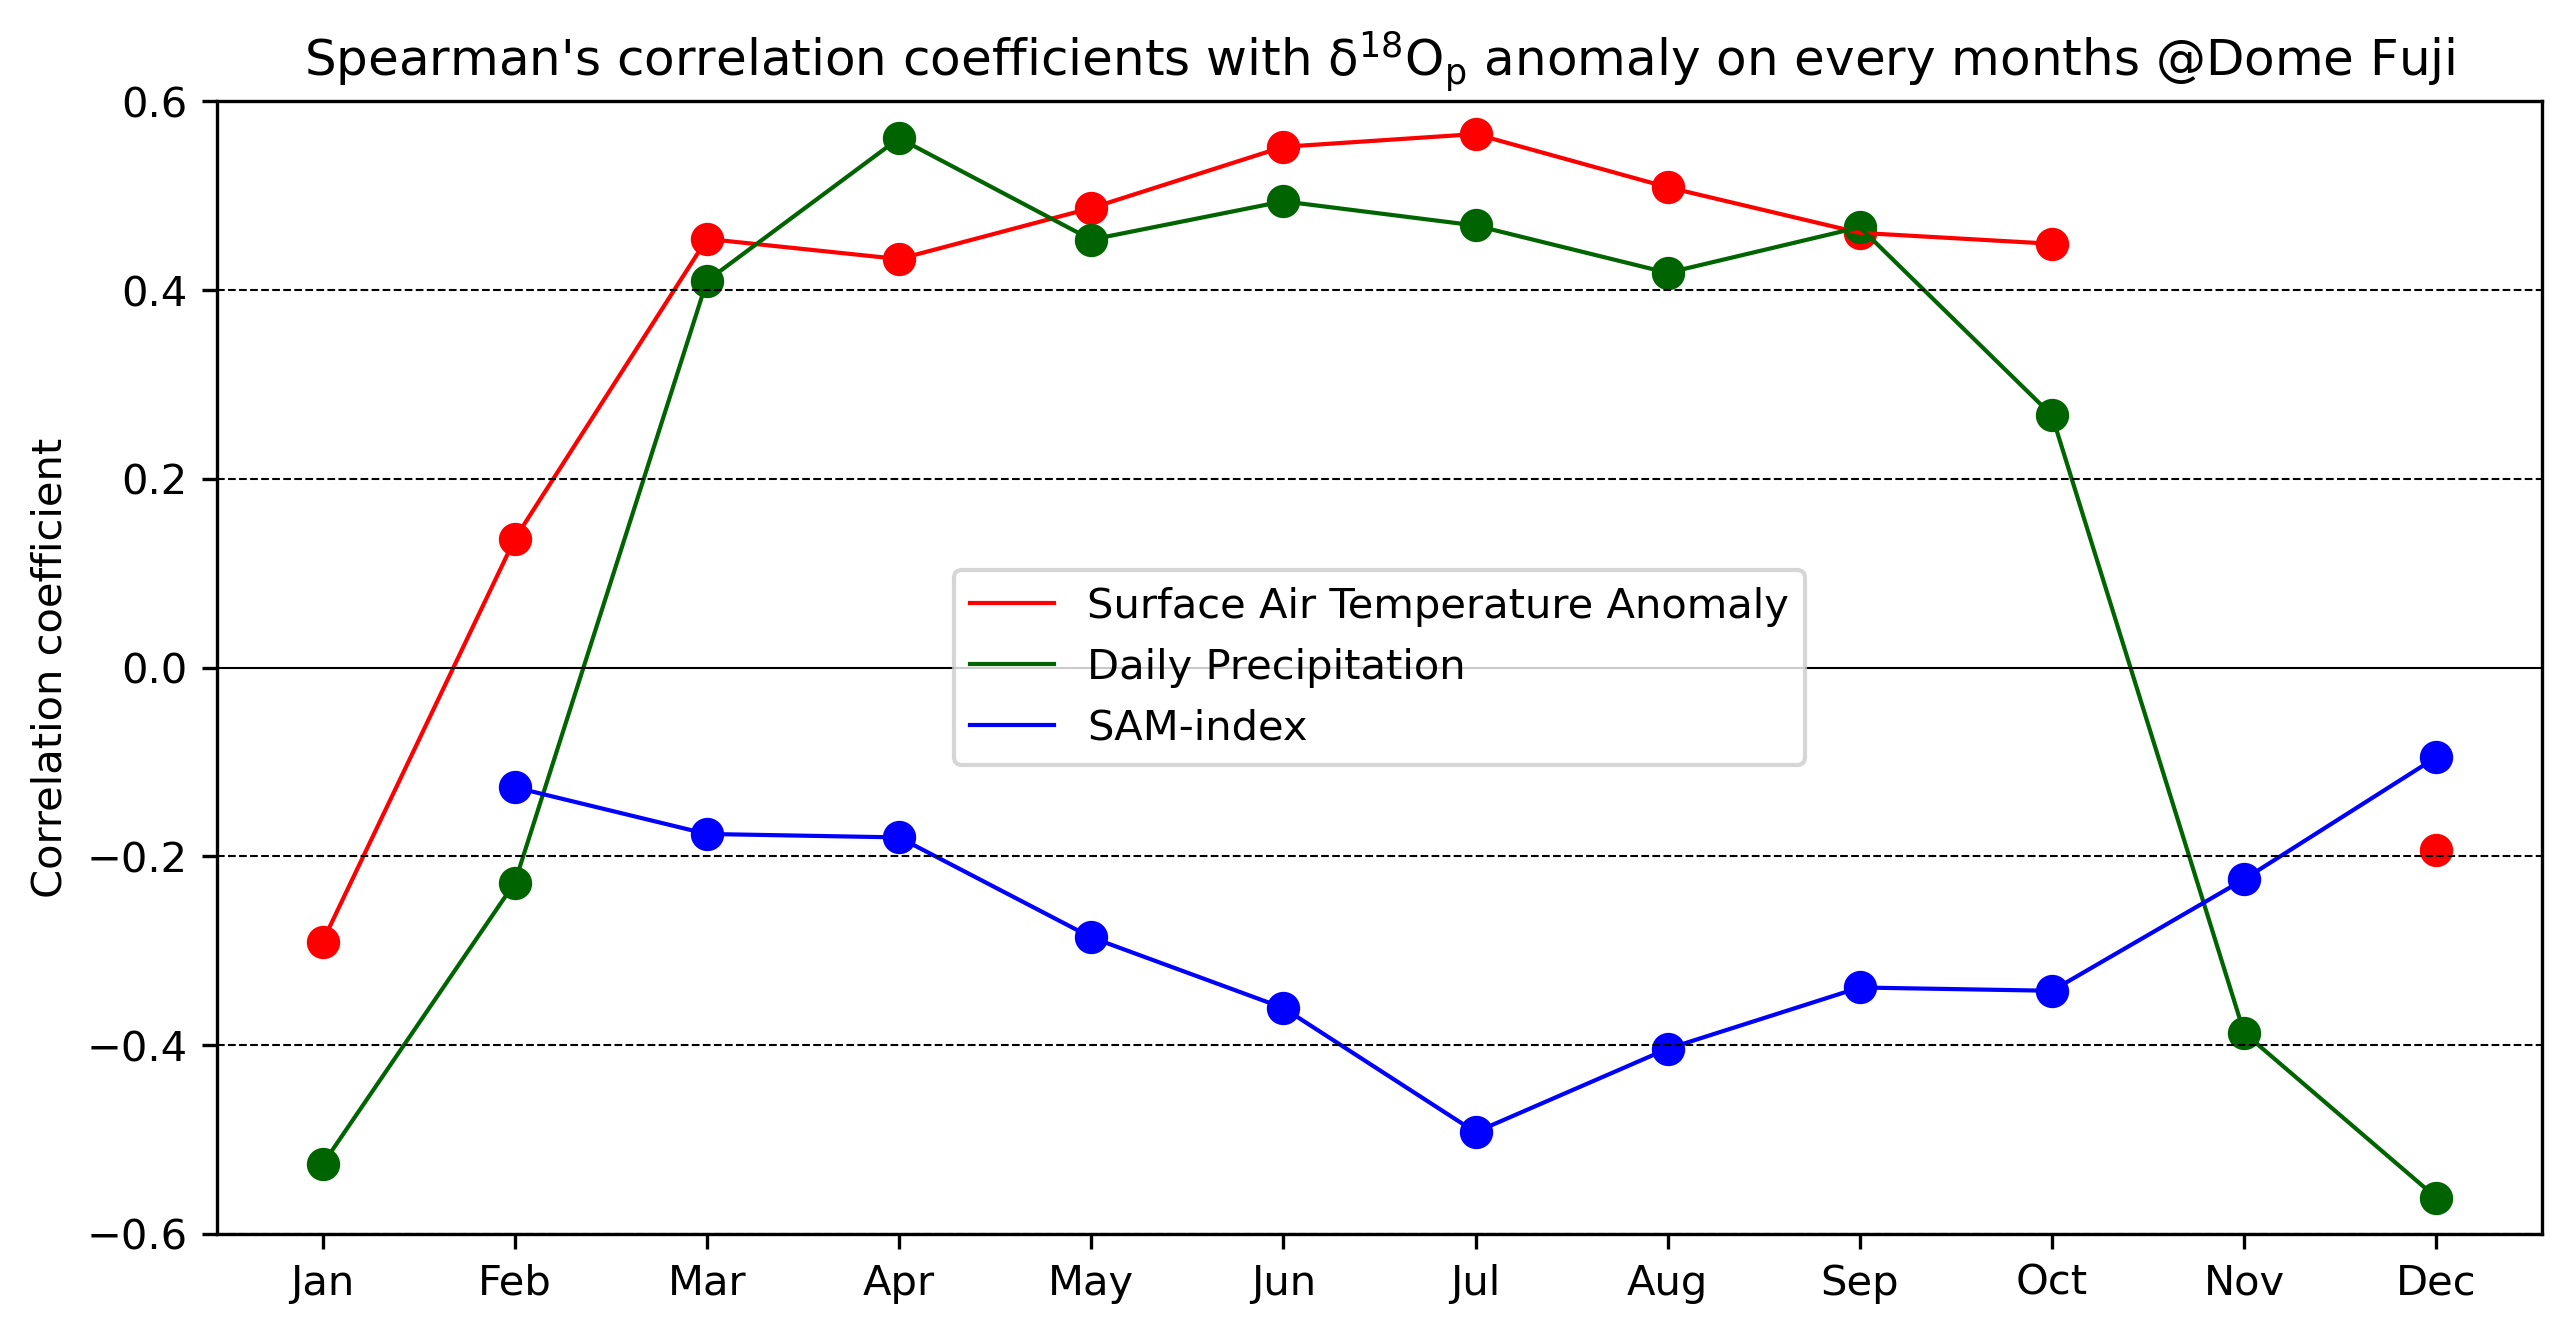

In [27]:
df_spearmanr = pd.DataFrame(
    data=[num,
          spearmanr(df_all[["Mon","d18O","temp"]],"temp","d18O").T["r"].values,
          spearmanr(df_all[["Mon","d18O","temp"]],"temp","d18O").T["p"].values,
          spearmanr(df_all[["Mon","d18O","prcp"]],"prcp","d18O").T["r"].values,
          spearmanr(df_all[["Mon","d18O","prcp"]],"prcp","d18O").T["p"].values,
          spearmanr(df_all[["Mon","d18O","sam" ]],"sam" ,"d18O").T["r"].values,
          spearmanr(df_all[["Mon","d18O","sam" ]],"sam" ,"d18O").T["p"].values
         ],
    index=["Number","corr_temp","p_temp", "corr_prcp", "p_prcp", "corr_sam", "p_sam"],
    columns=mons["name"][:12]).T

df_spearmanr["corr_temp"][df_spearmanr["p_temp"]>p_value] = np.nan
df_spearmanr["corr_prcp"][df_spearmanr["p_prcp"]>p_value] = np.nan
df_spearmanr["corr_sam" ][df_spearmanr["p_sam" ]>p_value] = np.nan
#
fig = plt.figure(figsize=(10,5)) 
ax = draw_d18O2(df_spearmanr)
plt.title("Spearman's correlation coefficients with $\mathsf{\delta^{18}O_p}$ anomaly on every months @Dome Fuji")
plt.show()
fig.savefig("correlation_spearman.png")

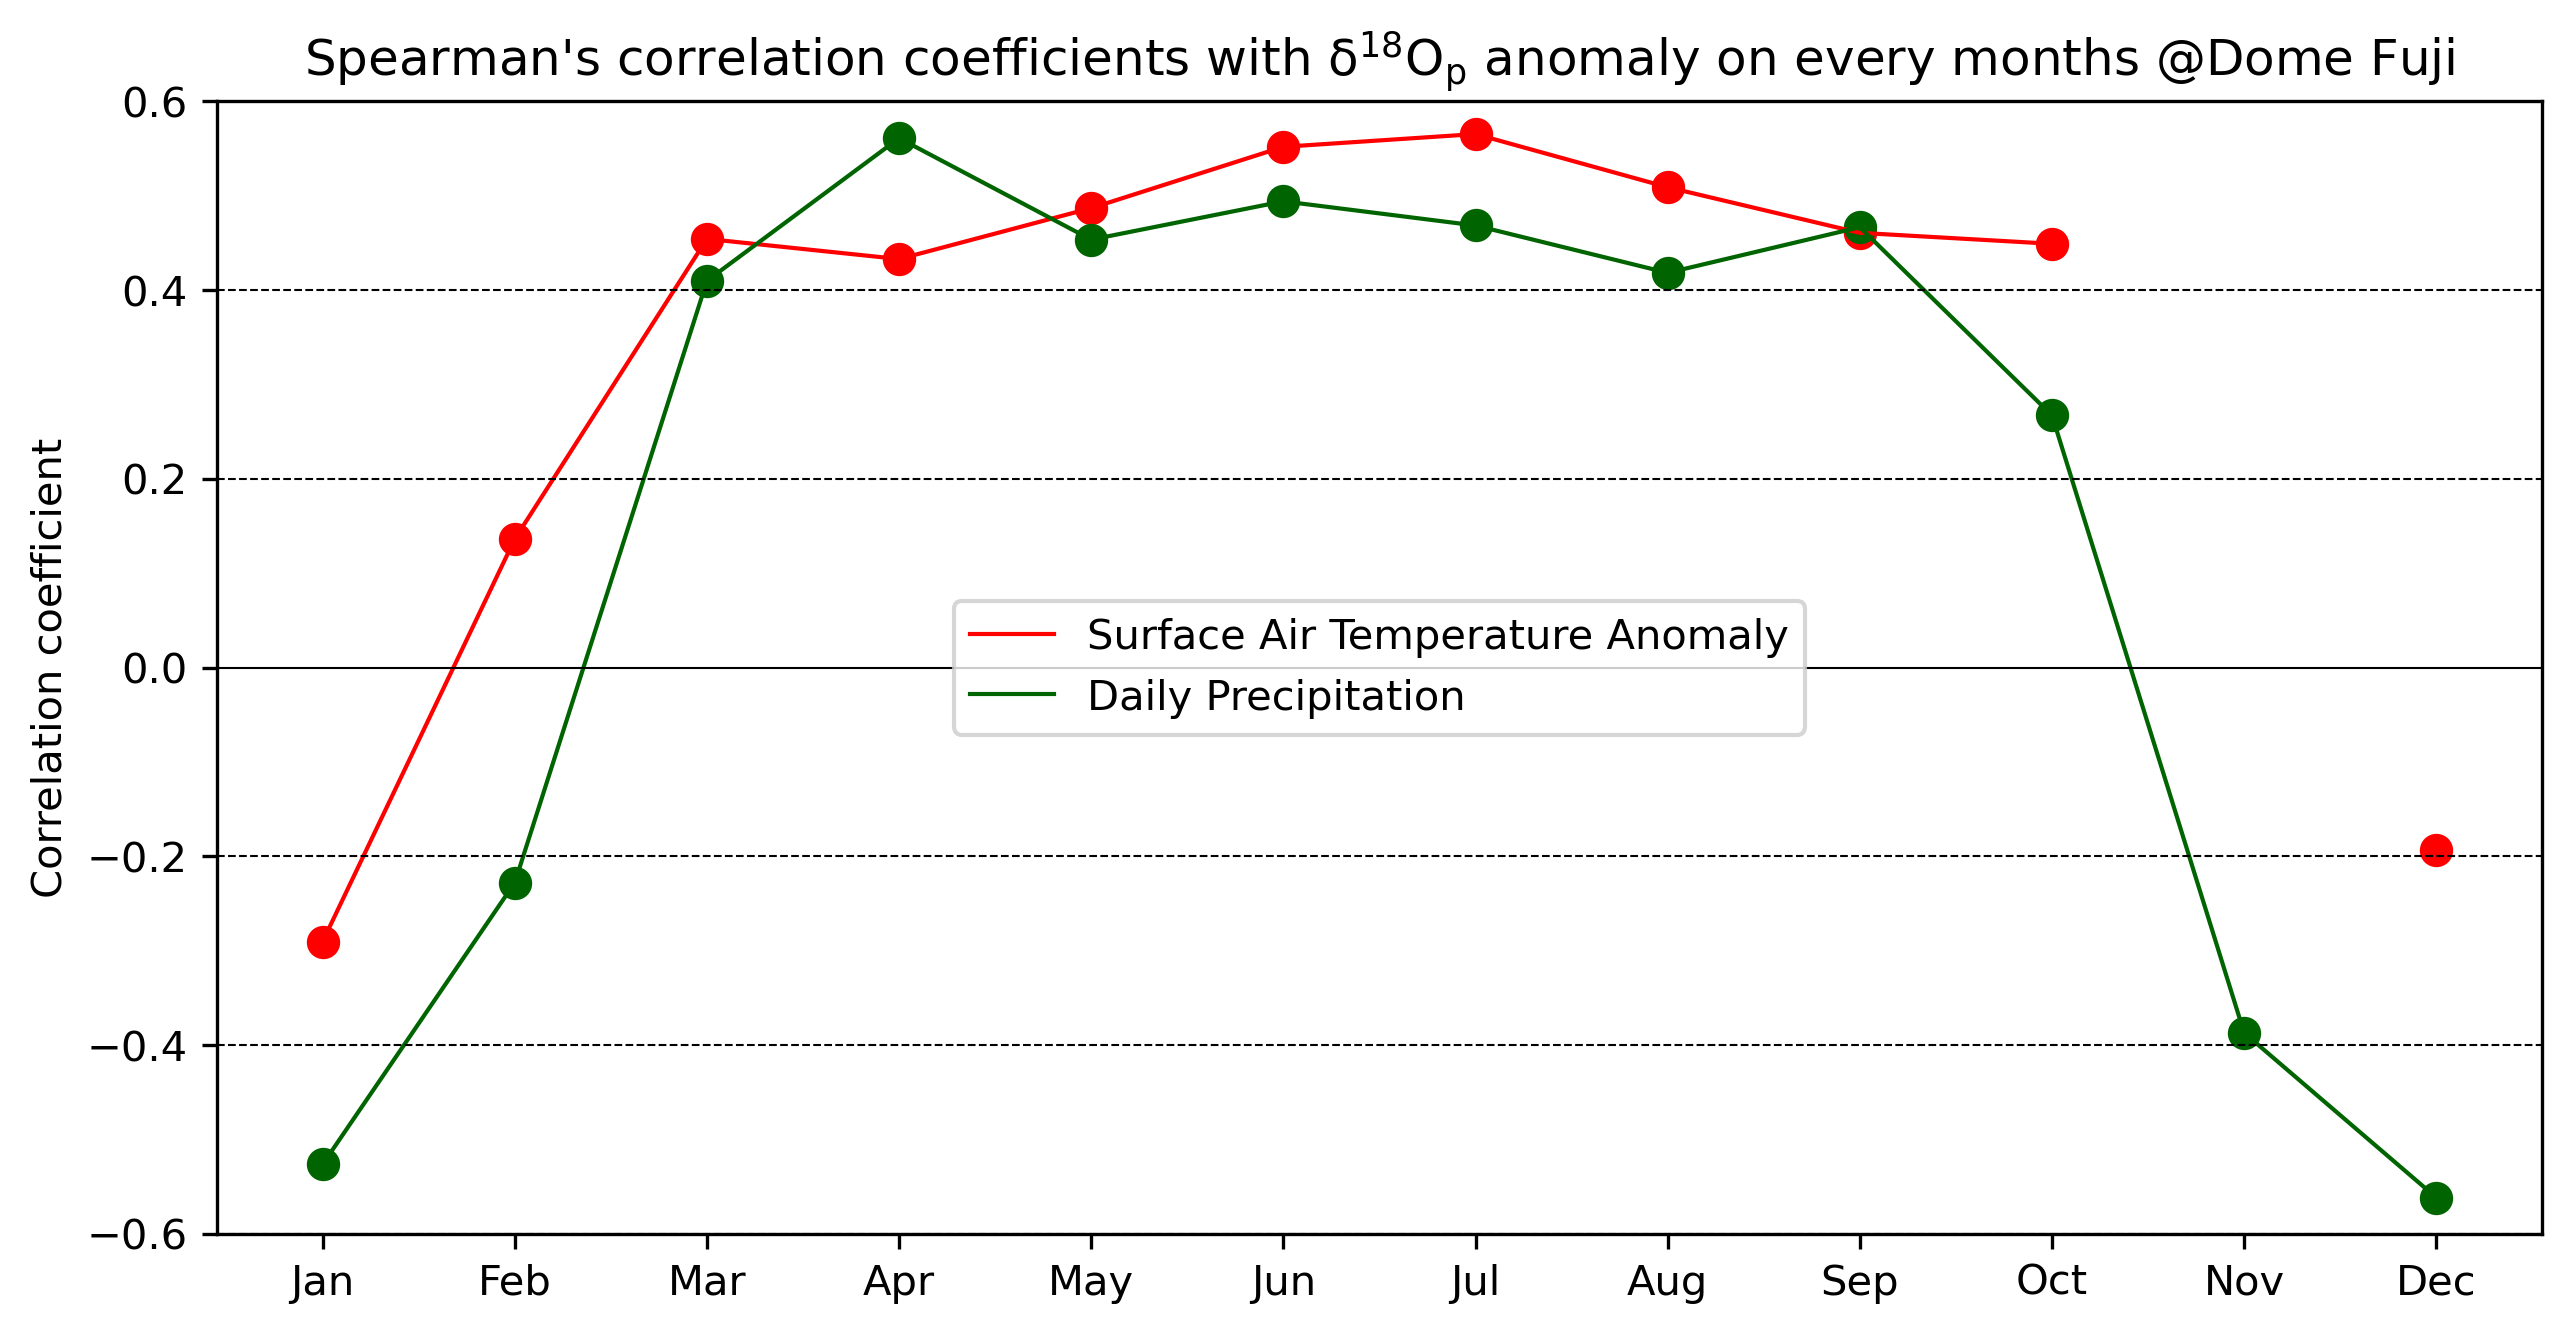

In [29]:
fig = plt.figure(figsize=(10,5)) 
ax = draw_d18O3(df_spearmanr)
plt.title("Spearman's correlation coefficients with $\mathsf{\delta^{18}O_p}$ anomaly on every months @Dome Fuji")
plt.show()
fig.savefig("correlation4TP_spearman.png")

In [30]:
df_spearmanr["Number"]=df_spearmanr["Number"].astype("int")
df_spearmanr[["corr_temp","corr_prcp","corr_sam"]]=df_spearmanr[["corr_temp","corr_prcp","corr_sam"]].round(3)
df_spearmanr.T

name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Number,9.300000e+02,8.470000e+02,9.300000e+02,9.000000e+02,9.300000e+02,9.000000e+02,9.300000e+02,9.300000e+02,8.960000e+02,8.580000e+02,8.930000e+02,9.300000e+02
corr_temp,-2.900000e-01,1.360000e-01,4.540000e-01,4.330000e-01,4.870000e-01,5.520000e-01,5.650000e-01,5.090000e-01,4.610000e-01,4.490000e-01,NaN,-1.940000e-01
p_temp,1.632274e-19,6.913237e-05,1.575392e-48,2.104434e-42,1.631328e-56,7.421459e-73,1.185822e-79,1.978408e-62,2.883706e-48,8.319284e-44,5.795052e-01,2.651041e-09
corr_prcp,-5.260000e-01,-2.280000e-01,4.100000e-01,5.610000e-01,4.530000e-01,4.940000e-01,4.680000e-01,4.180000e-01,4.670000e-01,2.670000e-01,-3.870000e-01,-5.620000e-01
p_prcp,2.177972e-67,1.934926e-11,5.692590e-39,9.815796e-76,2.359683e-48,1.456432e-56,6.638885e-52,1.096579e-40,1.202093e-49,1.709722e-15,2.809693e-33,2.088205e-78
corr_sam,NaN,-1.270000e-01,-1.760000e-01,-1.800000e-01,-2.860000e-01,-3.610000e-01,-4.920000e-01,-4.040000e-01,-3.390000e-01,-3.420000e-01,-2.240000e-01,-9.500000e-02
p_sam,1.088612e-01,2.143423e-04,6.254928e-08,5.462931e-08,5.977626e-19,4.947410e-29,6.253299e-58,8.416553e-38,1.571727e-25,5.126824e-25,1.203067e-11,3.727173e-03


In [22]:
def kendalltau(varin, var1,var2, p_value=0.05):
    # https://qiita.com/dacciinfo/items/88debe69f9f4e927aafc
    df_out = pd.DataFrame.from_dict({
        "r":np.zeros(12),
        "p":np.zeros(12)
    }, orient="columns")
    df_out.index = mons["name"][:12]
    
    for mm in range(12):
        df =  varin[varin["Mon"]==mm+1]   
        df_out["r"][mm], df_out["p"][mm] = stats.kendalltau(df[var1],df[var2])
    return df_out.T

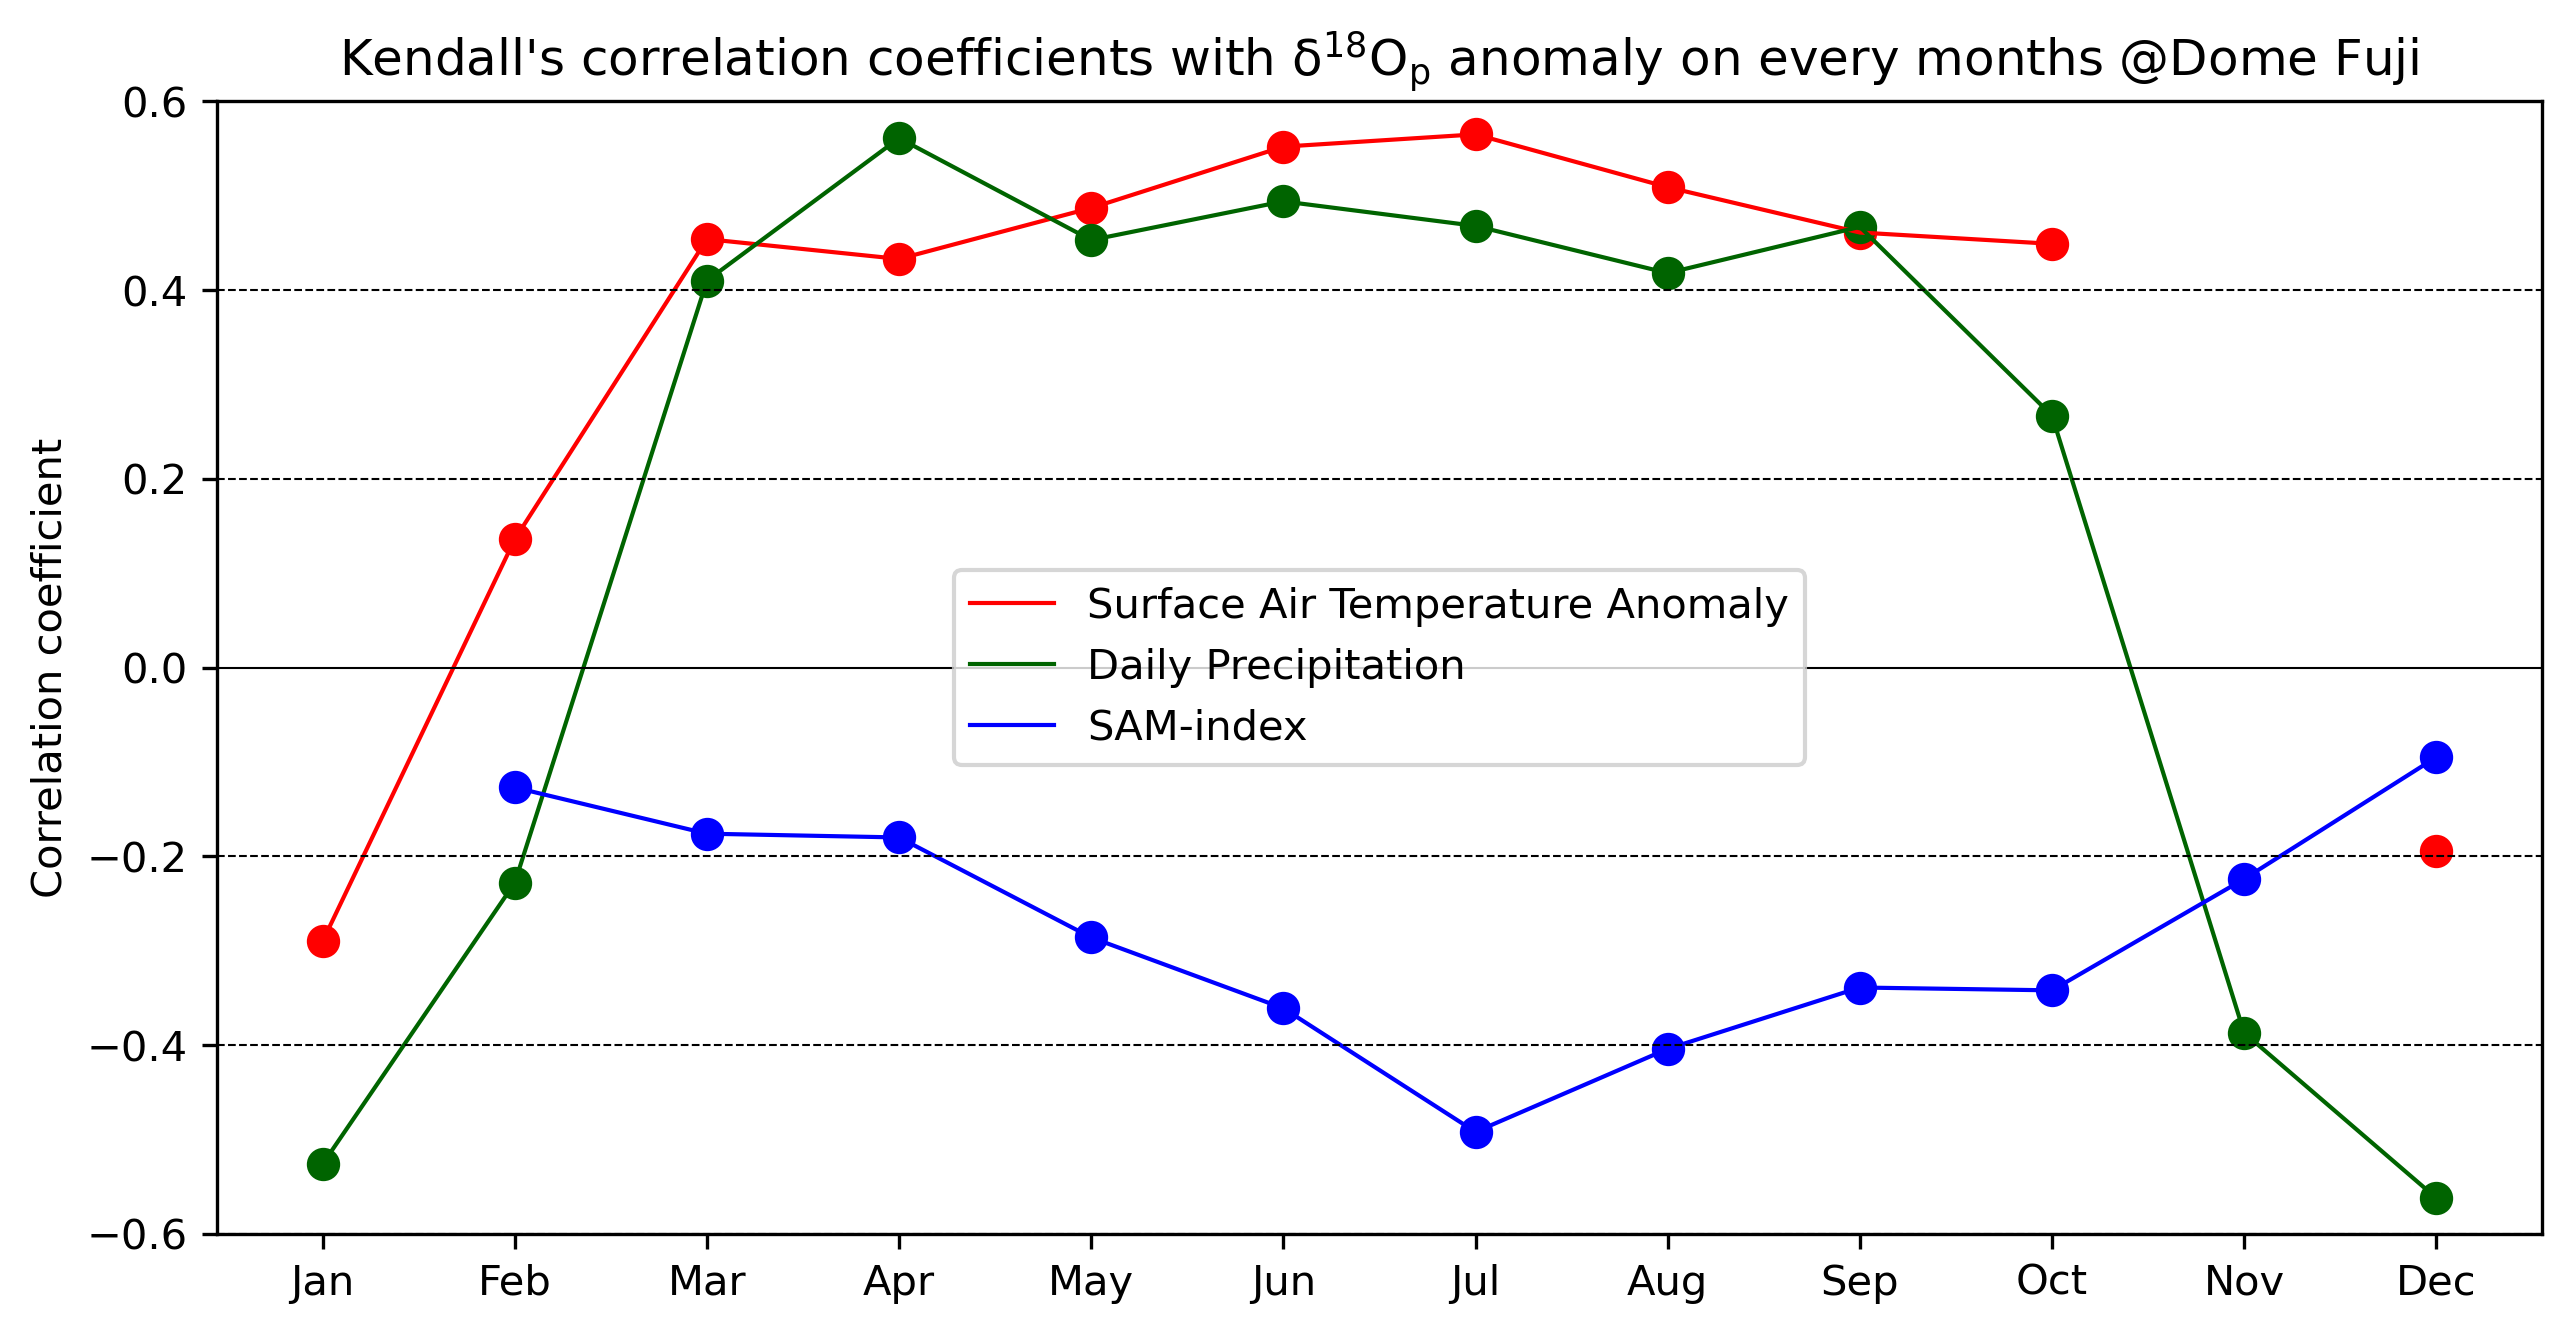

In [23]:
df_kendalltau = pd.DataFrame(
    data=[num,
          kendalltau(df_all[["Mon","d18O","temp"]],"temp","d18O").T["r"].values,
          kendalltau(df_all[["Mon","d18O","temp"]],"temp","d18O").T["p"].values,
          kendalltau(df_all[["Mon","d18O","prcp"]],"prcp","d18O").T["r"].values,
          kendalltau(df_all[["Mon","d18O","prcp"]],"prcp","d18O").T["p"].values,
          kendalltau(df_all[["Mon","d18O","sam" ]],"sam" ,"d18O").T["r"].values,
          kendalltau(df_all[["Mon","d18O","sam" ]],"sam" ,"d18O").T["p"].values
         ],
    index=["Number","corr_temp","p_temp", "corr_prcp", "p_prcp", "corr_sam", "p_sam"],
    columns=mons["name"][:12]).T
df_kendalltau["corr_temp"][df_kendalltau["p_temp"]>p_value] = np.nan
df_kendalltau["corr_prcp"][df_kendalltau["p_prcp"]>p_value] = np.nan
df_kendalltau["corr_sam" ][df_kendalltau["p_sam" ]>p_value] = np.nan
#
fig = plt.figure(figsize=(10,5)) 
ax = draw_d18O2(df_spearmanr)
plt.title("Kendall's correlation coefficients with $\mathsf{\delta^{18}O_p}$ anomaly on every months @Dome Fuji")
plt.show()
fig.savefig("correlation_kendall.png")    

In [24]:
df_kendalltau["Number"]=df_spearmanr["Number"].astype("int")
df_kendalltau[["corr_temp","corr_prcp","corr_sam"]]=df_kendalltau[["corr_temp","corr_prcp","corr_sam"]].round(3)
df_kendalltau

,Number,corr_temp,p_temp,corr_prcp,p_prcp,corr_sam,p_sam
name,,,,,,,
Jan,930,-0.195,5.120360e-19,-0.368,2.831622e-63,NaN,1.121335e-01
Feb,847,0.090,8.834339e-05,-0.154,1.855264e-11,-0.085,2.183111e-04
Mar,930,0.314,1.531113e-46,0.284,2.155207e-38,-0.119,6.209527e-08
Apr,900,0.300,2.094322e-41,0.391,4.177441e-69,-0.121,5.390523e-08
May,930,0.341,1.298198e-54,0.312,4.770093e-46,-0.195,5.632179e-19
Jun,900,0.384,1.277799e-66,0.343,1.573963e-53,-0.247,1.642179e-28
Jul,930,0.398,1.009934e-73,0.329,3.911115e-51,-0.338,1.097301e-53
Aug,930,0.354,9.317856e-59,0.287,2.636443e-39,-0.277,1.341246e-36
Sep,896,0.317,8.788645e-46,0.323,1.719449e-47,-0.228,1.561765e-24


In [25]:
def wilcoxon(varin, var1,var2, p_value=0.05):
    # https://wagtail.cds.tohoku.ac.jp/coda/python/p-7-array-stat-tests-wilcoxon-signed-rank.html
    df_out = pd.DataFrame.from_dict({
        "w":np.zeros(12),
        "p":np.zeros(12)
    }, orient="columns")
    df_out.index = mons["name"][:12]
    
    for mm in range(12):
        df =  varin[varin["Mon"]==mm+1]   
        df_out["w"][mm], df_out["p"][mm] = stats.wilcoxon(df[var1],df[var2])
    return df_out.T.round(3) 

In [26]:
df_wilcoxon = pd.DataFrame(
    data=[num,
          wilcoxon(df_all[["Mon","d18O","temp"]],"temp","d18O").T["w"].values,
          wilcoxon(df_all[["Mon","d18O","temp"]],"temp","d18O").T["p"].values,
          wilcoxon(df_all[["Mon","d18O","prcp"]],"prcp","d18O").T["w"].values,
          wilcoxon(df_all[["Mon","d18O","prcp"]],"prcp","d18O").T["p"].values,
          wilcoxon(df_all[["Mon","d18O","sam" ]],"sam" ,"d18O").T["w"].values,
          wilcoxon(df_all[["Mon","d18O","sam" ]],"sam" ,"d18O").T["p"].values
         ],
    index=["Number","w_temp","p_temp", "w_prcp", "p_prcp", "w_sam", "p_sam"],
    columns=mons["name"][:12]).T   
df_wilcoxon["Number"]=df_wilcoxon["Number"].astype("int")

df_wilcoxon

,Number,w_temp,p_temp,w_prcp,p_prcp,w_sam,p_sam
name,,,,,,,
Jan,930,206001.0,0.202,208105.0,0.308,203230.0,0.106
Feb,847,178247.0,0.853,178861.0,0.921,177809.0,0.805
Mar,930,212325.5,0.614,212256.0,0.608,210989.0,0.505
Apr,900,200573.0,0.783,201704.0,0.896,200917.0,0.817
May,930,210244.0,0.448,216360.0,0.991,215686.0,0.925
Jun,900,197861.0,0.533,201380.0,0.863,201979.0,0.924
Jul,930,211028.5,0.508,214164.0,0.780,213720.0,0.738
Aug,930,215460.0,0.903,215443.0,0.901,215452.0,0.902
Sep,896,192730.0,0.290,199069.0,0.810,199326.0,0.836


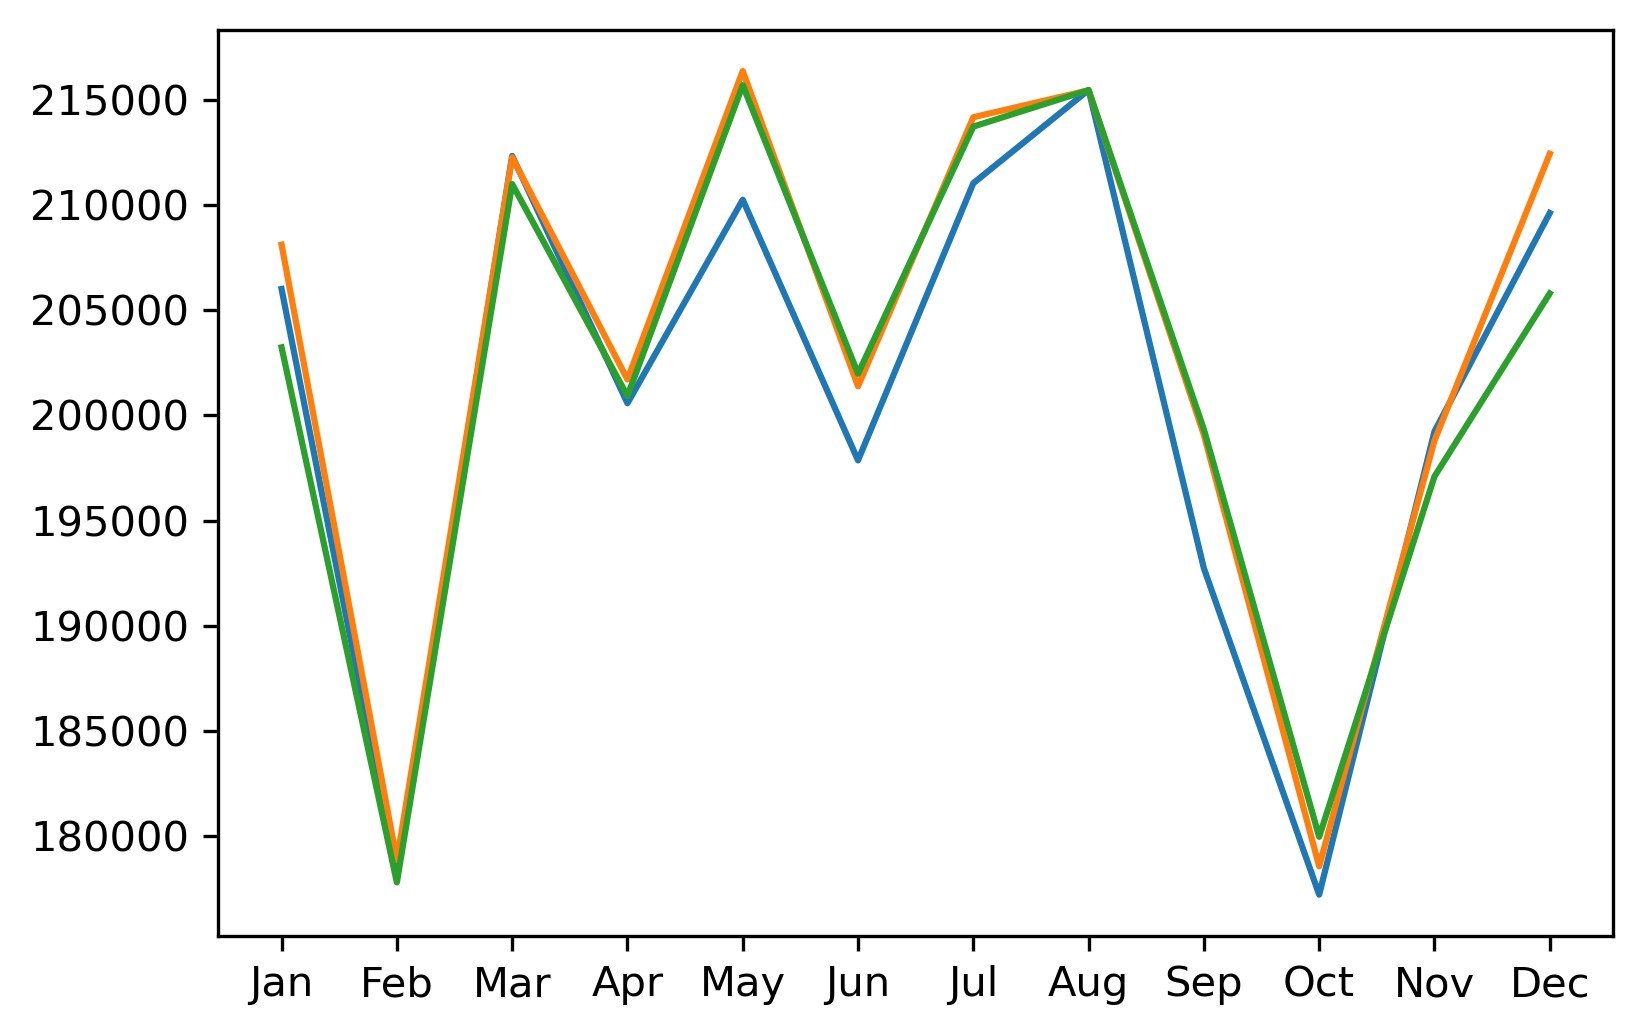

In [27]:
plt.plot(df_wilcoxon["w_temp"])
plt.plot(df_wilcoxon["w_prcp"])
plt.plot(df_wilcoxon["w_sam"])

Kanon Kino (kanon[at]aori.u-tokyo.ac.jp)